In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
torch.__version__

'2.4.0'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device 

device(type='cuda')

In [4]:
## known parameters
weight = 0.8
bias = 0.2

## creating data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias  ## formula

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440]]))

In [5]:
len(X),len(y)

(50, 50)

In [6]:
### spliting data into train and test
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:
len(X_train), len(y_train)

(40, 40)

In [8]:
len(X_test), len(y_test)

(10, 10)

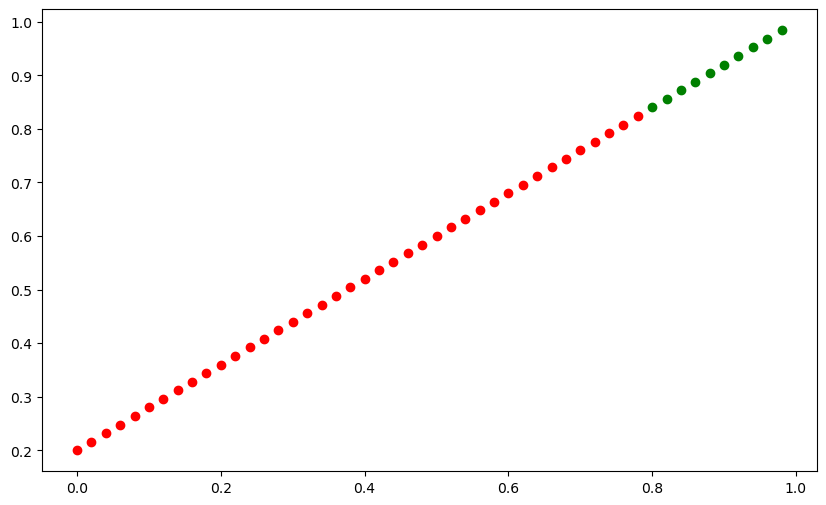

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,c="r",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.show()

### Linear Regression Model

In [31]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                requires_grad=True,  ## if the parameters requires gradient
                                dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                requires_grad=True,  ### it is set True by default
                                dtype=torch.float))
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [32]:
torch.manual_seed(42)

model = LinearRegression()

list(model.parameters())  

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
weight,bias

(0.8, 0.2)

In [35]:
### making predictions

with torch.inference_mode():  ## turns off gradient tracking
    y_preds = model(X_test)   ## makes your code faster since it does not track grad func

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

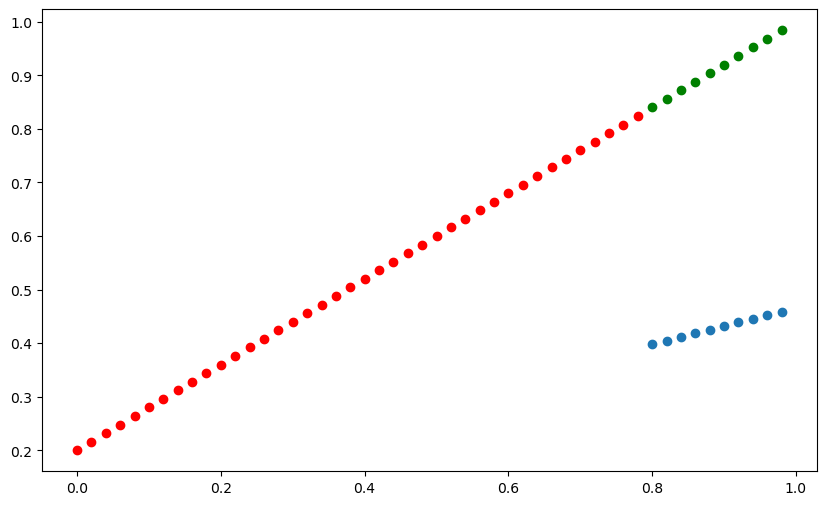

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,c="r",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.scatter(X_test,y_preds,label="Predictions")
plt.show()

In [37]:
y_preds = model(X_test)
y_preds   ### has the grad func 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [38]:
with torch.no_grad():
    y_preds = model(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [39]:
loss_fn = nn.L1Loss()  ## mean absolute squared error
optimizer = torch.optim.SGD(params=model.parameters(), ## stochastic gradient descent
                            lr=0.01)  ## learning rate

In [40]:
### training loop
## loop through the data
## calculate the loss
## gradient descent
epochs = 100
## tracking
epoch_count = []
loss_values = []
test_loss_values = []
## training loop
for epoch in range(epochs):
    model.train()  ## sets all parameters that requires gradients to require gradient
    ## forward pass
    y_pred = model(X_train) 
    ## calculate loss
    loss = loss_fn(y_pred, y_train) 
    print(f"Loss: {loss}") 
    ## optimizer zero grad
    optimizer.zero_grad()
    ## back prop
    loss.backward()
    ## performs gradient descent
    optimizer.step()
    ## testing
    model.eval()  ## turns off settings that are not needed for evaluation/testing
    with torch.inference_mode(): ## turns off gradient tracking and a couple more things bts
        ## forward pass
        test_pred = model(X_test)
        ## test loss
        test_loss = loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        ## printing our model state_dict
        print(model.state_dict())
    

Loss: 0.25188133120536804
Epoch: 0 | Loss: 0.25188133120536804 | Test Loss: 0.470065176486969
OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])})
Loss: 0.24036037921905518
Loss: 0.22883935272693634
Loss: 0.2173183411359787
Loss: 0.20579734444618225
Loss: 0.1942763328552246
Loss: 0.18275533616542816
Loss: 0.1712343394756317
Loss: 0.16016218066215515
Loss: 0.15058299899101257
Loss: 0.14190271496772766
Epoch: 10 | Loss: 0.14190271496772766 | Test Loss: 0.33994418382644653
OrderedDict({'weight': tensor([0.3795]), 'bias': tensor([0.2343])})
Loss: 0.13406160473823547
Loss: 0.12699952721595764
Loss: 0.12069326639175415
Loss: 0.11472223699092865
Loss: 0.10941245406866074
Loss: 0.10470227897167206
Loss: 0.10052935779094696
Loss: 0.09683910757303238
Loss: 0.0934247300028801
Loss: 0.09042375534772873
Epoch: 20 | Loss: 0.09042375534772873 | Test Loss: 0.2502245604991913
OrderedDict({'weight': tensor([0.4151]), 'bias': tensor([0.2923])})
Loss: 0.08777400106191635
Loss: 0.08536015450

In [41]:
print(f"Epoch Count: {epoch_count}")
print(f"Loss: {loss}")
print(f"Test Loss: {test_loss_values}")

Epoch Count: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Loss: 0.04610200226306915
Test Loss: [tensor(0.4701), tensor(0.3399), tensor(0.2502), tensor(0.1987), tensor(0.1696), tensor(0.1525), tensor(0.1415), tensor(0.1304), tensor(0.1222), tensor(0.1146)]


In [42]:
with torch.inference_mode():
    y_preds_new = model(X_test)

In [43]:
y_preds_new

tensor([[0.7538],
        [0.7652],
        [0.7767],
        [0.7881],
        [0.7995],
        [0.8110],
        [0.8224],
        [0.8339],
        [0.8453],
        [0.8568]])

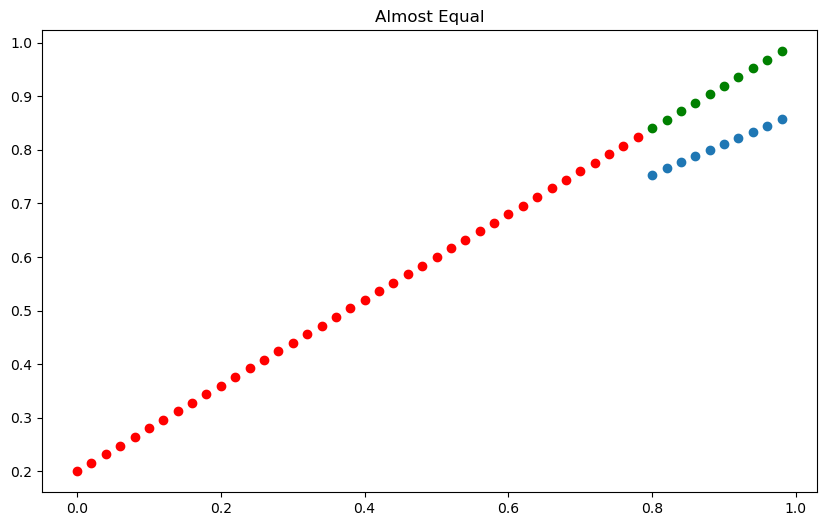

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,c="r",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.scatter(X_test,y_preds_new,label="Predictions")
plt.title("Almost Equal")
plt.show()

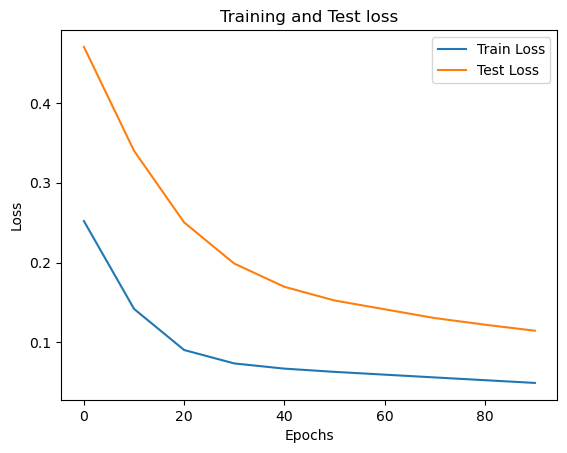

In [45]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### `Saving` a model in `Pytorch`

1. `torch.save()` - allows you save a PyTorch object in Pythn's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary

In [48]:
### Saving our PyTorch model
from pathlib import Path

### create model direvtory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

### model save path
MODEL_NAME = "01_pytorch_lr.pth"

MDOEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

### save the model state.dict()

print(f"Saving model to: {MDOEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), ## not the entire model , just the state dict
           f=MDOEL_SAVE_PATH)

Saving model to: models\01_pytorch_lr.pth


In [49]:
!ls -l models

total 4
-rw-r--r-- 1 ASUS 197121 1532 Aug 22 14:02 01_pytorch_lr.pth


In [54]:
### loading a pytorch model
loaded_model = LinearRegression()
### load the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MDOEL_SAVE_PATH,weights_only=True))

<All keys matched successfully>

In [55]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.5724])), ('bias', tensor([0.2958]))])

In [56]:
### make some predictions
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
    
loaded_model_preds

tensor([[0.7538],
        [0.7652],
        [0.7767],
        [0.7881],
        [0.7995],
        [0.8110],
        [0.8224],
        [0.8339],
        [0.8453],
        [0.8568]])

In [58]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[0.7538],
        [0.7652],
        [0.7767],
        [0.7881],
        [0.7995],
        [0.8110],
        [0.8224],
        [0.8339],
        [0.8453],
        [0.8568]])

In [59]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [60]:
y_preds_new

tensor([[0.7538],
        [0.7652],
        [0.7767],
        [0.7881],
        [0.7995],
        [0.8110],
        [0.8224],
        [0.8339],
        [0.8453],
        [0.8568]])